# Keplerian orbits
[<!-- module-gmod badge --><span class="module module-gmod">Gravity, Magnetism, and Orbital Dynamics</span>](module-gmod) 
```{index} Keplerian orbits
```
## Theory
```{index} Kepler's laws
```
Kepler laws were published in 17th century by Johannes Kepler based on observations of motion of planetary objects in the sky. 

```{admonition} Kepler's laws:
1. First law - the orbit of each planets is an ellipse with the Sun at the focus.
2. Second law - the line joining the planet to the Sun sweeps out equal areas in equal times.
3. Third law - $T^2\propto a^3$, where $T$ is the period and $a$ is the distance from the Sun.
```
These laws are good approximations of planetary motion in Solar System and are a consequence of gravitational attraction between planetary bodies.
```{index} Gravity force
```
The gravity force between two point masses is described as

$$F_G =-G\frac{mM}{r^2}\hat{\mathbf{r}},$$
where $r$ is the distance between these masses, G is a gravitational constant $G=6.674210\times 10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$ and $\hat{\mathbf{r}}$ is the unit vector in the direction of two point masses.

For two mutually gravitating bodies, an analytical solution to Kepler's first law exists. The equation of motion in Cartesian coordinates is:

$$-\frac{d^2\mathbf{r}}{dt^2}+\mu\frac{\mathbf{r}}{r^3}=0.$$

The analytical solution to this equation reveals trajectories of bodies to be of conical sections:

```{figure} ../images/conic_sections.png
:width: 300px
```

For three body problem, only in restricted cases analytical solutions can be found. One of such cases is when a test particle is placed in a system that does not move with respect to the centre of mass of the system and does not rotate with respect to itself:

```{figure} ../images/restricted_three_body_problem.PNG
:width: 400px
```
The solution to this problem reveals Lagrangian equilibrium points, where the test particle will maintain its position relative to larger bodies:

```{figure} ../images/lagrangian_points.PNG
:width: 400px
```

## Restricted three-body problem - numerical solution

In this notebook we will be solving a three body problem numerically using Runge-Kutta integration method. We will be solving coupled equations of motion for velocity and position:

\\[\frac{d\mathbf{r}}{dt} = \mathbf{v},\\]
\\[\frac{d\mathbf{v}}{dt} = \frac{\mathbf{F}(\mathbf{r(t)})}{m},\\]

where $\mathbf{r}$ is the position vector relative to centre of mass, $\mathbf{v}$ is the velocity vector and $\mathbf{F}$ is the net force on a body.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

At first, let's define masses of our bodies, constants such as radius of planet's orbit and position vectors with Sun placed at [0, 0]. The planet will be placed along the x-axis and the test particle will be placed at 60$^\circ$ from the Sun.

In [2]:
# Masses of bodies in the system
m_sun = 1.989*1e30
m_planet = 5.972*1e24
m_particle = 1

# Constants
G = 6.673210*1e-11
R = 151.99*1e6*1000

# Position vectors
r_sun = np.array([0,0])
r_planet = np.array([R+r_sun[0],0])
r_particle = np.array([R*np.cos(np.pi/3.), R*np.sin(np.pi/3.)])

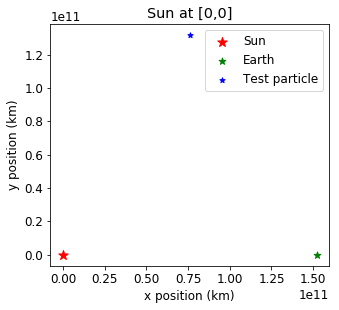

In [3]:
# Plot position vectors
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5,5))

plt.scatter(r_sun[0], r_sun[1], marker='*', c="red", s=100, label="Sun")
plt.scatter(r_planet[0], r_planet[1], marker='*', c="green", s=50, label="Earth")
plt.scatter(r_particle[0], r_particle[1], marker='*', c="blue", s=30, label="Test particle")

plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("x position (km)")
plt.ylabel("y position (km)")
plt.title("Sun at [0,0]")

plt.show()

### Centre of mass coordinate system
The centre of mass of the system can be calculated with
\\[R=\frac{\sum m_i r_i}{\sum m_i}.\\]
We can shift the position vectors with respect to the centre of mass then:

In [4]:
# Calculate centre of mass
# Test particle has mass so small, can be omitted
r_mass_centre = (r_planet*m_planet+r_sun*m_sun)/(m_planet+m_sun)

print("Position vectors with Sun at [0, 0]:")
print("Sun:", r_sun)
print("Earth:", r_planet)
print("Test particle:", r_particle)
print("\n")

# Convert into centre of mass coordinates
r_sun = r_sun - r_mass_centre
r_planet = r_planet - r_mass_centre
r_particle = r_particle - r_mass_centre

print("Position vectors with centre of mass at [0, 0]:")
print("Sun:", r_sun)
print("Earth:", r_planet)
print("Test particle:", r_particle)

Position vectors with Sun at [0, 0]:
Sun: [0 0]
Earth: [1.5199e+11 0.0000e+00]
Test particle: [7.59950000e+10 1.31627201e+11]


Position vectors with centre of mass at [0, 0]:
Sun: [-456350.70622101       0.        ]
Earth: [1.51989544e+11 0.00000000e+00]
Test particle: [7.59945436e+10 1.31627201e+11]


The mass of Sun is so big, shifting to centre of mass coordinates is very small compared to the distance between the Sun and the Earth:

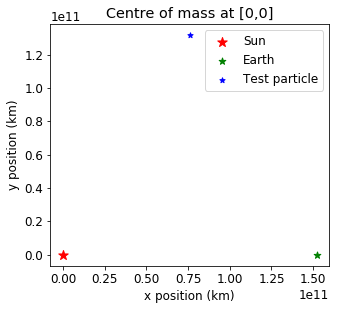

In [5]:
# Plot position vectors with centre of mass at [0, 0]
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5,5))

plt.scatter(r_sun[0], r_sun[1], marker='*', c="red", s=100, label="Sun")
plt.scatter(r_planet[0], r_planet[1], marker='*', c="green", s=50, label="Earth")
plt.scatter(r_particle[0], r_particle[1], marker='*', c="blue", s=30, label="Test particle")

plt.legend(loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("x position (km)")
plt.ylabel("y position (km)")
plt.title("Centre of mass at [0,0]")

plt.show()

### Initial velocities

Now, let's calculate the starting velocities of each object. According to Kepler's 3rd law, Earth's period can be calculated as:

\\[T^2=\frac{4\pi^2}{\mu}R^3,\quad\text{where }\mu=G(m_{Sun}+m_{Earth}).\\]

Thus, we can calculate the angular velocity in z-direction:

\\[\omega = \frac{2\pi}{T}=\sqrt{\frac{\mu}{R^3}}.\\]

Recall that, velocity vector and $\mathbf{\Omega}=[0,0, \omega]$ are related by relationship:

\\[\mathbf{v}=\mathbf{\Omega}\times\mathbf{r}.\\]

Therefore, we can calculate starting velocities of the system:

In [6]:
# Calculate angular velocity in z-direction
mu = G*(m_planet+m_sun)
omega = np.sqrt(mu/R**3)
print("Omega:", omega)

# Take vector cross product between omega vector and position vectors
v_sun = np.cross([0,0,omega],(r_sun))[:-1]
v_planet = np.cross([0,0,omega],(r_planet))[:-1]
v_particle = np.cross([0,0,omega], (r_particle))[:-1]

# All of them are within the same plane so third coordinate can be omitted
print("Sun's velocity:", v_sun)
print("Planet's velocity:", v_planet)
print("Particle's velocity:", v_particle)

Omega: 1.9442983920749965e-07
Sun's velocity: [-0.         -0.08872819]
Planet's velocity: [   -0.         29551.30253295]
Particle's velocity: [-25592.25554933  14775.60690238]


### Gravity force
Now we can define functions that we can use to solve the equations of motion. First, let's define gravitational force between two bodies $m_1$ and $m_2$, with position vectors $\mathbf{r_1}$ and $\mathbf{r_2}$ and vector between the bodies $\mathbf{r}=\mathbf{r_1}-\mathbf{r_2}$. The gravity force is calculated from:

\\[ F_G = -G\frac{m_1 m_2}{r^2}\hat{\mathbf{r}}.\\]

By definition $\hat{\mathbf{r}}=\frac{\mathbf{r}}{|\mathbf{r}|}$, therefore gravity force is:

\\[ F_g = -G\frac{m_1 m_2}{r^3}\mathbf{r}.\\]

To obtain vector's length in Python we can use numpy function:
    
    np.linalg.norm(vector)
    
We can now define GravityForce() function that will return gravitational force for these bodies:

In [7]:
def GravityForce(G, m1, r1, m2, r2):
    return -G*(m1*m2)/np.linalg.norm(r1-r2)**3*(r1-r2)

### Derivatives in the equations of motion

Now we need write a function that will calculate the derivatives in the motion equations $\frac{d\mathbf{r}}{dt}=\mathbf{v}$ and $\frac{d\mathbf{v}}{dt}=\frac{\mathbf{F}(\mathbf{r}(t))}{m}$. The first one is easy, as it is the velocity vector. The second one takes the net force. For example, for Sun, the net force would be:

\\[\mathbf{F_{Sun}}=\mathbf{F_{\text{planet on Sun}}+\mathbf{F_{\text{particle on Sun}}}}.\\]

For easier calculations we will define a main vector:

\\[\mathbf{y_{vector} = [r_{sun}, r_{planet}, r_{particle}, v_{sun}, v_{planet}, v_{particle}]}.\\]

The function to calculate derivatives will take respective parts of the $\mathbf{y_{vector}}$ and create an updated vector with these derivatives according to motion equations:

In [8]:
def CalcDerivatives(t, G, m1, m2, m3, y_vector):
    
    r1 = y_vector[0]
    r2 = y_vector[1]
    r3 = y_vector[2]
    drdt_1 = y_vector[3]
    drdt_2 = y_vector[4]
    drdt_3 = y_vector[5]
    
    dvdt_1 = (GravityForce(G, m1, r1, m2, r2) + GravityForce(G, m1, r1, m3, r3))/m1
    dvdt_2 = (GravityForce(G, m2, r2, m1, r1) + GravityForce(G, m2, r2, m3, r3))/m2
    dvdt_3 = (GravityForce(G, m3, r3, m2, r2) + GravityForce(G, m3, r3, m1, r1))/m3
    
    return np.array([drdt_1, drdt_2, drdt_3,dvdt_1, dvdt_2, dvdt_3])

#### Runge-Kutta method
We will use [Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) method to integrate over time the position and velocity vector. The problem can be formulated as follows. We have an initial value $y(t_0)=y_0$ and the derivative equation $\frac{d y}{dt}=f(t,y)$. We will iterate over $y$ and $t$ according to:

\\[ y_{n+1}=y_n+\frac{dt}{6}\times(h_1+2\times h_2+2\times h_3+h_4),\\]
\\[ t_{n+1}=t_n + dt,\\]

where $h_1,$, $h_2$, $h_3$ and $h_4$ are slopes at the beginning of the interval, at the midpoint using $h_1$, at the midpoint using $h_2$ and at the end of interval. The graphical representation can be viewed [here](https://commons.wikimedia.org/wiki/File:Runge-Kutta_slopes.svg).

The slopes are calculated according to:

\\[h_1 = f(t_n, y_n),\\]
\\[h_2 = f(t_n+\frac{dt}{2}, y_n+dt\times \frac{h_1}{2}),\\]
\\[h_3 = f(t_n+\frac{dt}{2}, y_n + dt\times \frac{h_2}{2}),\\]
\\[h_4 = f(t_n+dt, y_n + dt\times h_3).\\]

In [9]:
# Set y vector
y_vector = np.array([r_sun, r_planet, r_particle, v_sun, v_planet, v_particle])

# Set initial time and period
t = 0
period = np.sqrt(4*np.pi**2/(G*(m_planet+m_sun))*R**3)

# Set time step
dt = period/1000

# Empty lists to plot positions later
x_positions = []
y_positions = []
times = []

# Create while loop
while t < 0.5*period:
    
    # Append only position parts of the y vector
    x_positions.append(y_vector[:3,0])
    y_positions.append(y_vector[:3,1])
    
    # Calculate all slopes
    h1 = CalcDerivatives(t, G, m_sun, m_planet, m_particle, y_vector)
    h2 = CalcDerivatives(t+dt/2., G, m_sun, m_planet, m_particle, y_vector+dt/2.*h1)
    h3 = CalcDerivatives(t+dt/2., G, m_sun, m_planet, m_particle, y_vector+dt/2.*h2)
    h4 = CalcDerivatives(t+dt, G, m_sun, m_planet, m_particle, y_vector+dt*h3)

    # Update y vector
    y_vector = y_vector+dt/6.*(h1+2*h2+2*h3+h4)
    
    # Update time
    t = t + dt
    times.append(t)
       
x_positions, y_positions = np.array(x_positions), np.array(y_positions)

### Solution in the intertial frame
We can plot the trajectories in inertial frame:

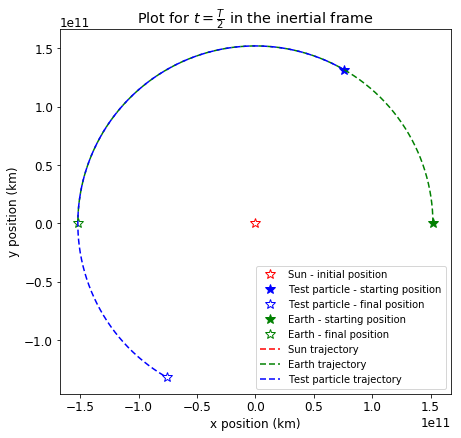

In [10]:
plt.figure(figsize=(7,7))    

plt.plot(x_positions[-1,0], y_positions[-1,0], '*',
         color = 'r', mfc='w',ms=10, label='Sun - initial position')

plt.plot(x_positions[0,2], y_positions[0,2], '*',
         color = 'b', mfc='b',ms=10, label='Test particle - starting position')

plt.plot(x_positions[-1,2], y_positions[-1,2], '*',
         color = 'b', mfc='w',ms=10, label='Test particle - final position')


plt.plot(x_positions[0,1], y_positions[0,1], '*',
         color = 'g', mfc='g',ms=10, label='Earth - starting position')

plt.plot(x_positions[-1,1], y_positions[-1,1], '*',
         color = 'g', mfc='w',ms=10, label='Earth - final position')

plt.plot(x_positions[:,0], y_positions[:,0], label="Sun trajectory",
        color="red", dashes=(4,2))

plt.plot(x_positions[:,1], y_positions[:,1], label="Earth trajectory",
        color="green", dashes=(4,2))

plt.plot(x_positions[:,2], y_positions[:,2], label="Test particle trajectory",
        color="blue", dashes=(4,2))


plt.xlabel('x position (km)')
plt.ylabel('y position (km)')
plt.title(r'Plot for $t = \frac{T}{2}$ in the inertial frame')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='best', fontsize="small")

plt.show()

### Solution in the rotating frame
```{index} Rotating coordinates
```
We can view the orbits in a frame where the planet is stationary. To do that we need to convert coordinates $(x,y)$ into rotating frame coordinates $(x',y')$. The rotating coordinates can be calculated with:
\\[x' = x\cos{(-\theta)}-y\sin{(-\theta)},\\]
\\[y' = x\sin{(-\theta)}+y\cos{(-\theta)},\\]
where $\theta$ is the angle between x-axis and position of the object we want the frame to be rotated to $(x_p, y_p)$ and can be calculated from $\theta=\tan^{-1}{(y_p/x_p)}$.

In [11]:
def TransformIntoRotatingFrame(r1, r2):
    
    theta = np.arctan2(r1[1], r1[0])
    
    return [r2[0]*np.cos(-theta)-r2[1]*np.sin(-theta),
              r2[0]*np.sin(-theta)+r2[1]*np.cos(theta)]


Previously we looked at a Lagranian equilibrium points. Instead, we can look at a particle placed at 45\\(^\circ\\) from the Sun that will create a differently shaped orbit.

```{admonition} Set up all variables
:class: dropdown, tip


    # Masses of bodies in the system
    m_sun = 1.989*1e30
    m_planet = 5.972*1e24
    m_particle = 1

    # Constants
    G = 6.673210*1e-11
    R = 151.99*1e6*1000

    # Position vectors
    r_sun = np.array([0,0])
    r_planet = np.array([R+r_sun[0],0])
    r_particle = np.array([R*np.cos(np.deg2rad(45)), R*np.sin(np.deg2rad(45))])
```

```{admonition} Calculate centre of mass and velocities
:class: dropdown, tip
    # Calculate centre of mass
    # Test particle has mass so small, can be omitted
    r_mass_centre = (r_planet*m_planet+r_sun*m_sun)/(m_planet+m_sun)

    # Convert into centre of mass cooridantes
    r_sun = r_sun - r_mass_centre
    r_planet = r_planet - r_mass_centre
    r_particle = r_particle - r_mass_centre
    
    
    # Calculate angular velocity in z-direction
    mu = G*(m_planet+m_sun)
    omega = np.sqrt(mu/R**3)

    # Take vector cross product between omega vector and position vectors
    v_sun = np.cross([0,0,omega],(r_sun))[:-1]
    v_planet = np.cross([0,0,omega],(r_planet))[:-1]
    v_particle = np.cross([0,0,omega], (r_particle))[:-1]
    
```

```{admonition} Calculate derivatives
:class: dropdown, tip

    # Set y vector
    y_vector = np.array([r_sun, r_planet, r_particle, v_sun, v_planet, v_particle])

    # Set initial time and period
    t = 0
    period = np.sqrt(4*np.pi**2/(G*(m_planet+m_sun))*R**3)

    # Set time step
    dt = period/1000

    # Empty lists to plot positions later
    x_positions = []
    y_positions = []

    rot_particle_positions = []

    times = []

    # Create while loop
    while t < period:
    
        # Append only position parts of the y vector
        x_positions.append(y_vector[:3,0])
        y_positions.append(y_vector[:3,1])

        x = y_vector[2,0]
        y = y_vector[2,1]
        xp = y_vector[1,0]
        yp = y_vector[1,1]

        rot_particle_positions.append(TransformIntoRotatingFrame([xp, yp], [x, y]))


        # Calculate all slopes
        h1 = CalcDerivatives(t, G, m_sun, m_planet, m_particle, y_vector)
        h2 = CalcDerivatives(t+dt/2., G, m_sun, m_planet, m_particle, y_vector+dt/2.*h1)
        h3 = CalcDerivatives(t+dt/2., G, m_sun, m_planet, m_particle, y_vector+dt/2.*h2)
        h4 = CalcDerivatives(t+dt, G, m_sun, m_planet, m_particle, y_vector+dt*h3)

        # Update y vector
        y_vector = y_vector+dt/6.*(h1+2*h2+2*h3+h4)

        # Update time
        t = t + dt
        times.append(t)
```

```{admonition} Plot results in the rotating frame
:class: dropdown, tip

    x_positions, y_positions = np.array(x_positions), np.array(y_positions)
    rot_particle_positions = np.array(rot_particle_positions)

    plt.figure(figsize=(7,7))    

    plt.plot(x_positions[-1,0], y_positions[-1,0], '*',
             color = 'r', mfc='w',ms=10, label='Sun')

    plt.plot(x_positions[0,2], y_positions[0,2], '*',
             color = 'b', mfc='b',ms=10, label='Test particle')


    plt.plot(x_positions[0,1], y_positions[0,1], '*',
             color = 'g', mfc='g',ms=10, label='Planet')

    plt.plot(rot_particle_positions[:,0],rot_particle_positions[:,1], label="Test particle trajectory",
            color="blue", dashes=(4,2))


    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.title(r'Plot for $t = T$ in rotating frame')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend(loc='best', fontsize="small")

    plt.show()
```

In [12]:
# Masses of bodies in the system
m_sun = 1.989*1e30
m_planet = 5.972*1e24
m_particle = 1

# Constants
G = 6.673210*1e-11
R = 151.99*1e6*1000

# Position vectors
r_sun = np.array([0,0])
r_planet = np.array([R+r_sun[0],0])
r_particle = np.array([R*np.cos(np.deg2rad(45)), R*np.sin(np.deg2rad(45))])

# Calculate centre of mass
# Test particle has mass so small, can be omitted
r_mass_centre = (r_planet*m_planet+r_sun*m_sun)/(m_planet+m_sun)

# Convert into centre of mass cooridantes
r_sun = r_sun - r_mass_centre
r_planet = r_planet - r_mass_centre
r_particle = r_particle - r_mass_centre

# Calculate angular velocity in z-direction
mu = G*(m_planet+m_sun)
omega = np.sqrt(mu/R**3)

# Take vector cross product between omega vector and position vectors
v_sun = np.cross([0,0,omega],(r_sun))[:-1]
v_planet = np.cross([0,0,omega],(r_planet))[:-1]
v_particle = np.cross([0,0,omega], (r_particle))[:-1]

# Set y vector
y_vector = np.array([r_sun, r_planet, r_particle, v_sun, v_planet, v_particle])

# Set initial time and period
t = 0
period = np.sqrt(4*np.pi**2/(G*(m_planet+m_sun))*R**3)

# Set time step
dt = period/1000

# Empty lists to plot positions later
x_positions = []
y_positions = []

rot_particle_positions = []

times = []

# Create while loop
while t < 400*period:
    
    # Append only position parts of the y vector
    x_positions.append(y_vector[:3,0])
    y_positions.append(y_vector[:3,1])
    
    x = y_vector[2,0]
    y = y_vector[2,1]
    xp = y_vector[1,0]
    yp = y_vector[1,1]
    
    rot_particle_positions.append(TransformIntoRotatingFrame([xp, yp], [x, y]))

    
    # Calculate all slopes
    h1 = CalcDerivatives(t, G, m_sun, m_planet, m_particle, y_vector)
    h2 = CalcDerivatives(t+dt/2., G, m_sun, m_planet, m_particle, y_vector+dt/2.*h1)
    h3 = CalcDerivatives(t+dt/2., G, m_sun, m_planet, m_particle, y_vector+dt/2.*h2)
    h4 = CalcDerivatives(t+dt, G, m_sun, m_planet, m_particle, y_vector+dt*h3)

    # Update y vector
    y_vector = y_vector+dt/6.*(h1+2*h2+2*h3+h4)
    
    # Update time
    t = t + dt
    times.append(t)
    
x_positions, y_positions = np.array(x_positions), np.array(y_positions)
rot_particle_positions = np.array(rot_particle_positions)

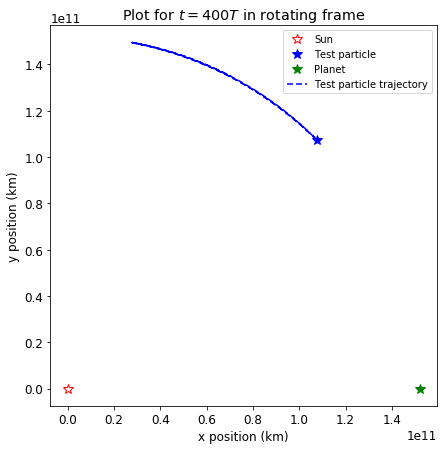

In [13]:
plt.figure(figsize=(7,7))    

plt.plot(x_positions[-1,0], y_positions[-1,0], '*',
         color = 'r', mfc='w',ms=10, label='Sun')

plt.plot(x_positions[0,2], y_positions[0,2], '*',
         color = 'b', mfc='b',ms=10, label='Test particle')


plt.plot(x_positions[0,1], y_positions[0,1], '*',
         color = 'g', mfc='g',ms=10, label='Planet')

plt.plot(rot_particle_positions[:,0],rot_particle_positions[:,1], label="Test particle trajectory",
        color="blue", dashes=(4,2))


plt.xlabel('x position (km)')
plt.ylabel('y position (km)')
plt.title(r'Plot for $t = 400T$ in rotating frame')

plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='best', fontsize="small")
plt.show()

In the rotating frame, it looks that the particle has a tadpole orbit around Lagrangian point L4 in a very narrow band:

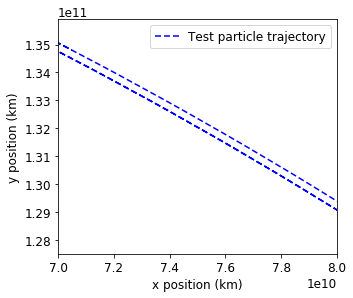

In [14]:
plt.figure(figsize=(5,5))
plt.plot(rot_particle_positions[:,0], rot_particle_positions[:,1],
         color="blue", dashes=(4,2), label="Test particle trajectory")

plt.xlim(0.7e11, 0.8e11)
plt.ylim(1.275e11, 1.359e11)
plt.xlabel("x position (km)")
plt.ylabel("y position (km)")
plt.gca().set_aspect("equal")
plt.legend(loc="best")

plt.show()

## Adding perturbations

If we increase Earth's mass by a factor of 1000, we obtain a much wider orbit:

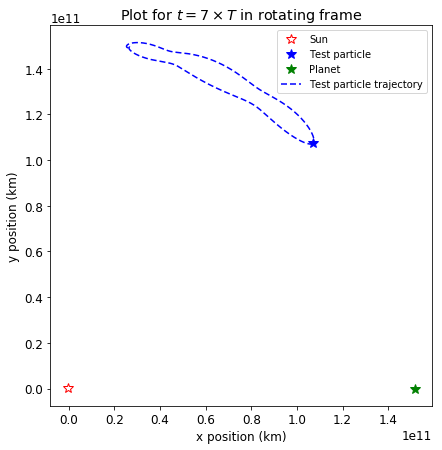

In [15]:
# Masses of bodies in the system
m_sun = 1.989*1e30
m_planet = 5.972*1e24*1e3
m_particle = 1

# Constants
G = 6.673210*1e-11
R = 151.99*1e6*1000

# Position vectors
r_sun = np.array([0,0])
r_planet = np.array([R+r_sun[0],0])
r_particle = np.array([R*np.cos(np.deg2rad(45)), R*np.sin(np.deg2rad(45))])

# Calculate centre of mass
# Test particle has mass so small, can be omitted
r_mass_centre = (r_planet*m_planet+r_sun*m_sun)/(m_planet+m_sun)

# Convert into centre of mass cooridantes
r_sun = r_sun - r_mass_centre
r_planet = r_planet - r_mass_centre
r_particle = r_particle - r_mass_centre

# Calculate angular velocity in z-direction
mu = G*(m_planet+m_sun)
omega = np.sqrt(mu/R**3)

# Take vector cross product between omega vector and position vectors
v_sun = np.cross([0,0,omega],(r_sun))[:-1]
v_planet = np.cross([0,0,omega],(r_planet))[:-1]
v_particle = np.cross([0,0,omega], (r_particle))[:-1]

# Set y vector
y_vector = np.array([r_sun, r_planet, r_particle, v_sun, v_planet, v_particle])

# Set initial time and period
t = 0
period = np.sqrt(4*np.pi**2/(G*(m_planet+m_sun))*R**3)

# Set time step
dt = period/1000

# Empty lists to plot positions later
x_positions = []
y_positions = []

rot_particle_positions = []

times = []

# Create while loop
while t < 7*period:
    
    # Append only position parts of the y vector
    x_positions.append(y_vector[:3,0])
    y_positions.append(y_vector[:3,1])
    
    x = y_vector[2,0]
    y = y_vector[2,1]
    xp = y_vector[1,0]
    yp = y_vector[1,1]
    
    rot_particle_positions.append(TransformIntoRotatingFrame([xp, yp], [x, y]))

    
    # Calculate all slopes
    h1 = CalcDerivatives(t, G, m_sun, m_planet, m_particle, y_vector)
    h2 = CalcDerivatives(t+dt/2., G, m_sun, m_planet, m_particle, y_vector+dt/2.*h1)
    h3 = CalcDerivatives(t+dt/2., G, m_sun, m_planet, m_particle, y_vector+dt/2.*h2)
    h4 = CalcDerivatives(t+dt, G, m_sun, m_planet, m_particle, y_vector+dt*h3)

    # Update y vector
    y_vector = y_vector+dt/6.*(h1+2*h2+2*h3+h4)
    
    # Update time
    t = t + dt
    times.append(t)
    
x_positions, y_positions = np.array(x_positions), np.array(y_positions)
rot_particle_positions = np.array(rot_particle_positions)

plt.figure(figsize=(7,7))    

plt.plot(x_positions[-1,0], y_positions[-1,0], '*',
         color = 'r', mfc='w',ms=10, label='Sun')

plt.plot(x_positions[0,2], y_positions[0,2], '*',
         color = 'b', mfc='b',ms=10, label='Test particle')


plt.plot(x_positions[0,1], y_positions[0,1], '*',
         color = 'g', mfc='g',ms=10, label='Planet')

plt.plot(rot_particle_positions[:,0],rot_particle_positions[:,1], label="Test particle trajectory",
        color="blue", dashes=(4,2))


plt.xlabel('x position (km)')
plt.ylabel('y position (km)')
plt.title(r'Plot for $t = 7\times T$ in rotating frame')

#plt.xlim(0.4e11, 0.5e11)
#plt.ylim(1.4e11,1.5e11)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='best', fontsize="small")
plt.show()

Try yourself playing around with the numbers and placement of the test particle to see how the orbit can change!

## References
* Material used in this notebook was based on lecture content of Gravity, Magnetism and Orbital Dynamics at Earth Science and Engineering Department at Imperial College London